# Data Train-Test Split

### Original vs Stratified split

In [2]:
from utils.data import read_MoGCN_data
import os

data_path = "./data/MoGCN/"
omics_file_names = ["fpkm_data.csv", "gistic_data.csv", "rppa_data.csv"]
gt_file_name = "sample_classes.csv"

omics_data, gt_data, samples_list, classes_list = read_MoGCN_data(
    omics_paths=[os.path.join(data_path, file) for file in omics_file_names],
    gt_data_path=os.path.join(data_path, gt_file_name),
)

Proportions of MoGCN train-test splits for each class


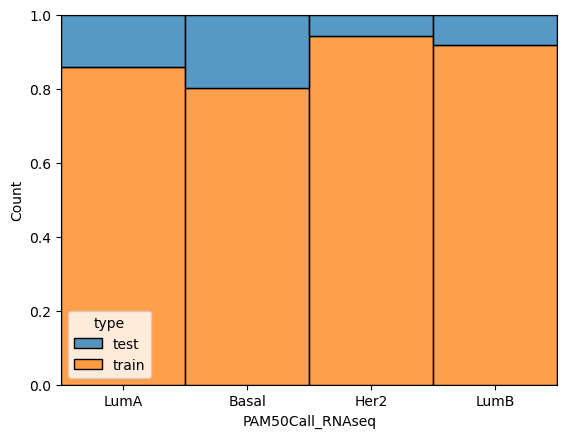

In [3]:
from utils.data import read_data
import pandas as pd
import seaborn as sns

test_sample = read_data(os.path.join(data_path, "test_sample.csv"))
train_sample = read_data(os.path.join(data_path, "train_sample.csv"))

test_data = gt_data.loc[gt_data["Sample"].isin(test_sample["Sample"])].copy()
test_data["type"]="test"
train_data = gt_data.loc[gt_data["Sample"].isin(train_sample["Sample"])].copy()
train_data["type"]="train"

sampled_data = pd.concat([test_data, train_data], ignore_index=True)

sns.histplot(x=sampled_data["PAM50Call_RNAseq"], hue=sampled_data["type"], multiple = "fill")
print("Proportions of MoGCN train-test splits for each class")

Proportions of Stratified train-test splits for each class


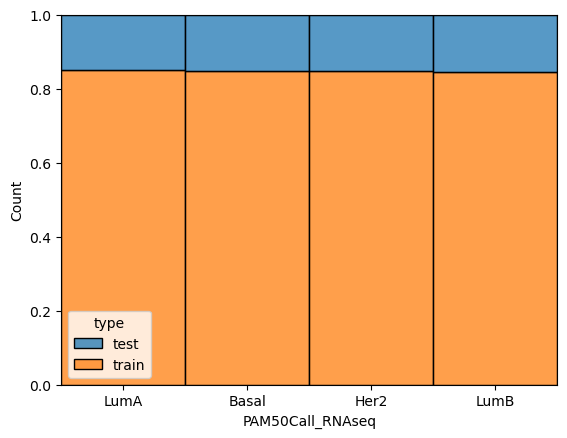

In [4]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(omics_data[0],gt_data,test_size=0.15, stratify=gt_data["class"]) 

y["type"] = "train"
y_test["type"] = "test"

strat_data = pd.concat([y_test, y], ignore_index=True)

sns.histplot(x=strat_data["PAM50Call_RNAseq"], hue=strat_data["type"], multiple = "fill")
print("Proportions of Stratified train-test splits for each class")

### Re-organise data folder structure and save stratified split

In [5]:
from utils.data import make_path, read_MoGCN_data, read_data
from sklearn.model_selection import train_test_split
import os


def data_to_csv(omics_data, gt_data, samples, output_path):
    make_path(output_path)

    omics_file_names = ["fpkm_data.csv", "gistic_data.csv", "rppa_data.csv"]

    for i in range(len(omics_file_names)):
        save_path = os.path.join(output_path, omics_file_names[i])
        data = omics_data[i].copy()
        filtered = data.loc[data["Sample"].isin(samples)].reset_index(drop=True).copy()
        filtered.to_csv(save_path, index=False)

    gt_file_name = "sample_classes.csv"
    save_path = os.path.join(output_path, gt_file_name)

    filtered = (
        gt_data.loc[gt_data["Sample"].isin(samples)].reset_index(drop=True).copy()
    )
    filtered.to_csv(save_path, index=False)


# Parameters
data_path = "./data/MoGCN/"
omics_file_names = ["fpkm_data.csv", "gistic_data.csv", "rppa_data.csv"]
gt_file_name = "sample_classes.csv"

# Load all MoGCN data
omics_data, gt_data, samples_list, classes_list = read_MoGCN_data(
    omics_paths=[os.path.join(data_path, file) for file in omics_file_names],
    gt_data_path=os.path.join(data_path, gt_file_name),
)

##### Load and save original splits

In [6]:
# Load original splits
train_samples = read_data("./data/MoGCN/train_sample.csv")["Sample"]
test_samples = read_data("./data/MoGCN/test_sample.csv")["Sample"]

# Save splits to csv
data_to_csv(omics_data, gt_data, train_samples, "./data/original_split/train")
data_to_csv(omics_data, gt_data, test_samples, "./data/original_split/test")

##### Create and save stratified splits

In [ ]:
test_size = 0.15

# Split into train-test
x, x_test, y, y_test = train_test_split(
    omics_data[0], gt_data, test_size=test_size, stratify=gt_data["class"]
)

# Save splits to csv
test_samples = y_test["Sample"]
train_samples = y["Sample"]


# data_to_csv(omics_data, gt_data, train_samples, "./data/stratified_split/train")
# data_to_csv(omics_data, gt_data, test_samples, "./data/stratified_split/test")

In [7]:
data_path = "./data/stratified_split/train/"
omics_file_names = ["fpkm_data.csv", "gistic_data.csv", "rppa_data.csv"]
gt_file_name = "sample_classes.csv"

omics_data, gt_data, samples_list, classes_list = read_MoGCN_data(
    omics_paths=[os.path.join(data_path, file) for file in omics_file_names],
    gt_data_path=os.path.join(data_path, gt_file_name),
)

for omics in omics_data:
    print(len(omics))

print(len(gt_data))

434
434
434
434


In [8]:
data_path = "./data/stratified_split/test/"
omics_file_names = ["fpkm_data.csv", "gistic_data.csv", "rppa_data.csv"]
gt_file_name = "sample_classes.csv"

omics_data, gt_data, samples_list, classes_list = read_MoGCN_data(
    omics_paths=[os.path.join(data_path, file) for file in omics_file_names],
    gt_data_path=os.path.join(data_path, gt_file_name),
)

for omics in omics_data:
    print(len(omics))

print(len(gt_data))

77
77
77
77


# Evaluate Baseline

## Results from running their GitHub repo (original split)
#### **Note: code shares training data (AE latent space, SNF fused network) when testing GCN**


- predict label:  [0 0 2 2 0 0 2 2 2 3 2 0 0 3 2 2 0 0 0 0 0 0 0 2 2 2 3 2 0 0 0 0 0 0 2 0 0
 2 0 2 1 0 1 0 0 0 2 0 0 1 1 1 0 2 0 0 0 2 0 0 0 2 0 0 2 2 0 2]
- original label:  [0 0 2 2 0 0 2 2 2 3 2 0 0 3 2 2 0 0 0 0 0 0 0 2 2 2 3 2 1 0 0 0 0 0 2 0 0
 2 0 2 1 0 1 1 0 0 2 1 0 1 1 0 1 2 0 0 0 2 0 0 0 2 0 0 2 2 0 2]
 
- Test set results: loss= 0.1365 accuracy= 0.9265
- Acc(0.9265, 0.0000)  F1(0.9334, 0.0000)


In [2]:
!python ../Models/MoGCN/AE_run.py -p1 ./data/fpkm_data.csv -p2 ./data/gistic_data.csv -p3 ./data/rppa_data.csv -m 0 -s 0 -d cpu

Training model...
epoch: 1 | loss: 63.7949
epoch: 2 | loss: 40.6257
epoch: 3 | loss: 26.1860
epoch: 4 | loss: 17.4162
epoch: 5 | loss: 12.2317
epoch: 6 | loss: 9.2268
epoch: 7 | loss: 7.4781
epoch: 8 | loss: 6.4419
epoch: 9 | loss: 5.8268
epoch: 10 | loss: 5.4522
epoch: 11 | loss: 5.2107
epoch: 12 | loss: 5.0522
epoch: 13 | loss: 4.9372
epoch: 14 | loss: 4.8558
epoch: 15 | loss: 4.7836
epoch: 16 | loss: 4.7273
epoch: 17 | loss: 4.6703
epoch: 18 | loss: 4.6185
epoch: 19 | loss: 4.5668
epoch: 20 | loss: 4.5157
epoch: 21 | loss: 4.4672
epoch: 22 | loss: 4.4239
epoch: 23 | loss: 4.3898
epoch: 24 | loss: 4.3430
epoch: 25 | loss: 4.3076
epoch: 26 | loss: 4.2593
epoch: 27 | loss: 4.2175
epoch: 28 | loss: 4.1830
epoch: 29 | loss: 4.1420
epoch: 30 | loss: 4.1097
epoch: 31 | loss: 4.0718
epoch: 32 | loss: 4.0398
epoch: 33 | loss: 4.0098
epoch: 34 | loss: 3.9853
epoch: 35 | loss: 3.9578
epoch: 36 | loss: 3.9121
epoch: 37 | loss: 3.8838
epoch: 38 | loss: 3.8691
epoch: 39 | loss: 3.8361
epoch: 40 |

In [5]:
!python ../Models/MoGCN/SNF.py -p ./data/fpkm_data.csv ./data/gistic_data.csv ./data/rppa_data.csv -m sqeuclidean

Load data files...
(511, 19581) (511, 19274) (511, 224)
Start similarity network fusion...
Save fused adjacency matrix...
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matr

In [6]:
!python ../Models/MoGCN/GCN_run.py -fd result/latent_data.csv -ad result/SNF_fused_matrix.csv -ld ./data/sample_classes.csv -ts ./data/test_sample.csv -m 1 -d gpu -p 20

loading data...
Calculating the laplace adjacency matrix...
Begin training model...
Epoch: 10.00 | loss train: 1.2102 | acc train: 0.4808
Epoch: 20.00 | loss train: 1.0925 | acc train: 0.5305
Epoch: 30.00 | loss train: 0.9462 | acc train: 0.6614
Epoch: 40.00 | loss train: 0.7426 | acc train: 0.7223
Epoch: 50.00 | loss train: 0.5765 | acc train: 0.7788
Epoch: 60.00 | loss train: 0.4773 | acc train: 0.8375
Epoch: 70.00 | loss train: 0.4303 | acc train: 0.8510
Epoch: 80.00 | loss train: 0.3768 | acc train: 0.8736
Epoch: 90.00 | loss train: 0.3586 | acc train: 0.8781
Epoch: 100.00 | loss train: 0.3171 | acc train: 0.9007
Epoch: 110.00 | loss train: 0.3018 | acc train: 0.8984
Epoch: 120.00 | loss train: 0.2886 | acc train: 0.9142
Epoch: 130.00 | loss train: 0.2900 | acc train: 0.9097
Epoch: 140.00 | loss train: 0.2697 | acc train: 0.9097
Epoch: 150.00 | loss train: 0.2858 | acc train: 0.9074
Training finished.
The best epoch model is  145
predict label:  [0 0 2 2 0 0 2 2 2 3 2 0 0 3 2 2 0 0

In [36]:
!python ../MoGCN/GCN_run.py -fd result/latent_data.csv -ad result/SNF_fused_matrix.csv -ld ./data/MoGCN/sample_classes.csv -ts ./data/MoGCN/test_sample.csv -m 0 -d gpu -p 20

loading data...
Calculating the laplace adjacency matrix...
Begin training model...
Epoch: 10.00 | loss train: 1.1975 | acc train: 0.4858
Epoch: 20.00 | loss train: 1.0805 | acc train: 0.5839
Epoch: 30.00 | loss train: 0.9282 | acc train: 0.6819
Epoch: 40.00 | loss train: 0.7247 | acc train: 0.7190
Epoch: 50.00 | loss train: 0.5636 | acc train: 0.7800
Epoch: 60.00 | loss train: 0.4659 | acc train: 0.8366
Epoch: 70.00 | loss train: 0.4181 | acc train: 0.8584
Epoch: 80.00 | loss train: 0.3604 | acc train: 0.8780
Epoch: 90.00 | loss train: 0.3412 | acc train: 0.8824
Epoch: 100.00 | loss train: 0.3051 | acc train: 0.9085
Epoch: 110.00 | loss train: 0.2874 | acc train: 0.9020
Epoch: 120.00 | loss train: 0.2710 | acc train: 0.9085
Epoch: 130.00 | loss train: 0.2753 | acc train: 0.9085
Epoch: 140.00 | loss train: 0.2506 | acc train: 0.9063
Epoch: 150.00 | loss train: 0.2563 | acc train: 0.9172
predict label:  [2 3 0 0 0 0 0 3 0 0 2 2 1 2 2 1 0 0 0 3 0 0 0 0 2 0 0 3 0 3 0 0 2 3 0 0 1
 0 1 0 0 

## Results from modified GitHub repo code (original split)

#### **Note: code has been modified to use AE and SNF without sharing training data when testing GCN**
- predict label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
- original label:  [0 0 2 2 0 0 2 2 2 3 2 0 0 3 2 2 0 0 0 0 0 0 0 2 2 2 3 2 1 0 0 0 0 0 2 0 0
 2 0 2 1 0 1 1 0 0 2 1 0 1 1 0 1 2 0 0 0 2 0 0 0 2 0 0 2 2 0 2]

- Test set results: loss= 1.2201 accuracy= 0.5147
- Acc(0.5147, 0.0000)  F1(0.6796, 0.0000)

### Train

In [2]:
!python ../MoGCN/AE_run.py -p1 ./data/original_split/train/fpkm_data.csv -p2 ./data/original_split/train/gistic_data.csv -p3 ./data/original_split/train/rppa_data.csv -m 0 -s 0 -d cpu

Training model...
epoch: 1 | loss: 57.3638
epoch: 2 | loss: 38.5932
epoch: 3 | loss: 26.1857
epoch: 4 | loss: 18.0734
epoch: 5 | loss: 12.9168
epoch: 6 | loss: 9.6933
epoch: 7 | loss: 7.6876
epoch: 8 | loss: 6.4357
epoch: 9 | loss: 5.6580
epoch: 10 | loss: 5.1476
epoch: 11 | loss: 4.8289
epoch: 12 | loss: 4.6105
epoch: 13 | loss: 4.4597
epoch: 14 | loss: 4.3564
epoch: 15 | loss: 4.2778
epoch: 16 | loss: 4.2156
epoch: 17 | loss: 4.1681
epoch: 18 | loss: 4.1204
epoch: 19 | loss: 4.0776
epoch: 20 | loss: 4.0348
epoch: 21 | loss: 3.9958
epoch: 22 | loss: 3.9669
epoch: 23 | loss: 3.9321
epoch: 24 | loss: 3.8903
epoch: 25 | loss: 3.8571
epoch: 26 | loss: 3.8225
epoch: 27 | loss: 3.7921
epoch: 28 | loss: 3.7584
epoch: 29 | loss: 3.7281
epoch: 30 | loss: 3.6831
epoch: 31 | loss: 3.6689
epoch: 32 | loss: 3.6315
epoch: 33 | loss: 3.6099
epoch: 34 | loss: 3.5866
epoch: 35 | loss: 3.5649
epoch: 36 | loss: 3.5523
epoch: 37 | loss: 3.5083
epoch: 38 | loss: 3.4925
epoch: 39 | loss: 3.4559
epoch: 40 |

In [3]:
!python ../MoGCN/AE_run.py -p1 ./data/MoGCN/fpkm_data.csv -p2 ./data/MoGCN/gistic_data.csv -p3 ./data/MoGCN/rppa_data.csv -m 2 -s 0 -d cpu

Get the latent layer output...
Success! Results can be seen in result file


In [4]:
!python ../MoGCN/SNF.py -p ./data/MoGCN/fpkm_data.csv ./data/MoGCN/gistic_data.csv ./data/MoGCN/rppa_data.csv -m sqeuclidean

Load data files...
(511, 19581) (511, 19274) (511, 224)
Start similarity network fusion...
Save fused adjacency matrix...
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/davide/miniconda3/envs/omics/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matr

In [5]:
!python ../MoGCN/GCN_run.py -fd result/latent_data.csv -ad result/SNF_fused_matrix.csv -ld ./data/MoGCN/sample_classes.csv -ts ./data/MoGCN/test_sample.csv -m 0 -d gpu -p 20

loading data...
Calculating the laplace adjacency matrix...
Begin training model...
Epoch: 10.00 | loss train: 1.2026 | acc train: 0.4858
Epoch: 20.00 | loss train: 1.0916 | acc train: 0.5577
Epoch: 30.00 | loss train: 0.9474 | acc train: 0.6776
Epoch: 40.00 | loss train: 0.7458 | acc train: 0.7168
Epoch: 50.00 | loss train: 0.5812 | acc train: 0.7712
Epoch: 60.00 | loss train: 0.4827 | acc train: 0.8279
Epoch: 70.00 | loss train: 0.4332 | acc train: 0.8519
Epoch: 80.00 | loss train: 0.3737 | acc train: 0.8758
Epoch: 90.00 | loss train: 0.3533 | acc train: 0.8845
Epoch: 100.00 | loss train: 0.3186 | acc train: 0.8954
Epoch: 110.00 | loss train: 0.3000 | acc train: 0.8954
Epoch: 120.00 | loss train: 0.2846 | acc train: 0.9041
Epoch: 130.00 | loss train: 0.2913 | acc train: 0.8998
Epoch: 140.00 | loss train: 0.2655 | acc train: 0.9020
Epoch: 150.00 | loss train: 0.2704 | acc train: 0.9063
predict label:  [2 3 0 0 0 0 0 3 0 0 2 2 1 2 2 0 0 0 0 3 0 0 0 0 2 0 0 3 0 3 0 0 2 3 1 0 1
 0 1 0 0 

In [6]:
!python ../MoGCN/GCN_run.py -fd result/latent_data.csv -ad result/SNF_fused_matrix.csv -ld ./data/MoGCN/sample_classes.csv -ts ./data/MoGCN/test_sample.csv -m 1 -d gpu -p 20

loading data...
Calculating the laplace adjacency matrix...
Begin training model...
Epoch: 10.00 | loss train: 1.2149 | acc train: 0.4808
Epoch: 20.00 | loss train: 1.1015 | acc train: 0.5214
Epoch: 30.00 | loss train: 0.9621 | acc train: 0.6569
Epoch: 40.00 | loss train: 0.7605 | acc train: 0.7088
Epoch: 50.00 | loss train: 0.5906 | acc train: 0.7675
Epoch: 60.00 | loss train: 0.4902 | acc train: 0.8307
Epoch: 70.00 | loss train: 0.4402 | acc train: 0.8510
Epoch: 80.00 | loss train: 0.3849 | acc train: 0.8713
Epoch: 90.00 | loss train: 0.3670 | acc train: 0.8736
Epoch: 100.00 | loss train: 0.3262 | acc train: 0.8939
Epoch: 110.00 | loss train: 0.3107 | acc train: 0.8894
Epoch: 120.00 | loss train: 0.2994 | acc train: 0.9074
Epoch: 130.00 | loss train: 0.3023 | acc train: 0.9074
Epoch: 140.00 | loss train: 0.2819 | acc train: 0.9029
Epoch: 150.00 | loss train: 0.2981 | acc train: 0.9007
Training finished.
The best epoch model is  145
predict label:  [0 0 2 2 0 0 2 2 2 3 2 0 0 3 2 2 0 0